# Investimento nel settore media negli USA

### Introduzione

L’oggetto del seguente report è quello di valutare l’opportunità di un investimento nel settore “Media” negli Stati Uniti d’America. Per fare ciò sono state prese in considerazione ed analizzate le relazioni che intercorrono tra la variabile target “EPS”, ovvero l’utile per azione, e un insieme di variabili di tipo finanziarie associate ad una lista di aziende negli Stati Uniti. Attraverso una regressione lineare è stato possibile ottenere una stima dell’utile a 12 mesi per azione in base alle caratteristiche delle aziende.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns           
from scipy import stats              

In [3]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [4]:
# Caricamento dei dataset
df_Targets = pd.read_excel('Russell_3000_Fundamentals_Enlarged_With_README.xlsx', sheet_name='Targets')
df_Features = pd.read_excel('Russell_3000_Fundamentals_Enlarged_With_README.xlsx', sheet_name='Features')

In [5]:
df_Targets.info()
df_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Record ID        2493 non-null   int64  
 1   EPS_12M_FORWARD  2493 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 39.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Record ID                   2493 non-null   int64  
 1   Isin                        2493 non-null   object 
 2   Record Name                 2493 non-null   object 
 3   INDUSTRY                    2493 non-null   object 
 4   SUB_INDUSTRY                2493 non-null   object 
 5   FREE_CASH_FLOW              2493 non-null   float64
 6   EBITDA                      2493 non-null   float64
 7   ENTERPRISE_VALUE            2493 n

In [5]:
# Merge dei dataset
df = pd.merge(df_Features, df_Targets, on='Record ID')
#df.drop_duplicates(subset=['Isin'], inplace=True)
df.drop(columns=['Record ID'], inplace=True)

In [6]:
df.isnull().sum()

Isin                          0
Record Name                   0
INDUSTRY                      0
SUB_INDUSTRY                  0
FREE_CASH_FLOW                0
EBITDA                        0
ENTERPRISE_VALUE              0
NET_SALES                     0
RETURN_ON_ EQUITY             0
RETURN_ON_INVESTED_CAPITAl    0
RETURN_ON_ASSET               0
EPS_12M_FORWARD               0
dtype: int64

Rimozione outliers

In [6]:
var_num = df.select_dtypes(include=np.number).columns
for col in var_num:
  # Calculate z-scores
  z_scores = np.abs(stats.zscore(df[col]))
  # Identify outliers (boolean mask)
  outliers = z_scores > 2
  # Drop rows based on the mask (boolean indexing)
  df = df[~outliers]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 160 to 2492
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Isin                        1976 non-null   object 
 1   Record Name                 1976 non-null   object 
 2   INDUSTRY                    1976 non-null   object 
 3   SUB_INDUSTRY                1976 non-null   object 
 4   FREE_CASH_FLOW              1976 non-null   float64
 5   EBITDA                      1976 non-null   float64
 6   ENTERPRISE_VALUE            1976 non-null   float64
 7   NET_SALES                   1976 non-null   float64
 8   RETURN_ON_ EQUITY           1976 non-null   float64
 9   RETURN_ON_INVESTED_CAPITAl  1976 non-null   float64
 10  RETURN_ON_ASSET             1976 non-null   float64
 11  EPS_12M_FORWARD             1976 non-null   float64
dtypes: float64(8), object(4)
memory usage: 200.7+ KB


Statistiche Sub Industry

La prima operazione è stata quella di verificare il numero di aziende incluse in ciascuna “Sub-
Industry”, con un'attenzione particolare al settore "Media". Da questa analisi sono risultate
solo 45 aziende appartenenti a questo settore. Dato il campione ridotto, si è deciso di
includere nell'analisi anche sub-industrie simili al settore oggetto di studio.


In [28]:
def grafici(df, variabile):
    for col in df:
        if col in var_num:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[col], y=variabile, data=df)
            plt.show()

In [ ]:
grafici(df, df['INDUSTRY'], boxplot) 

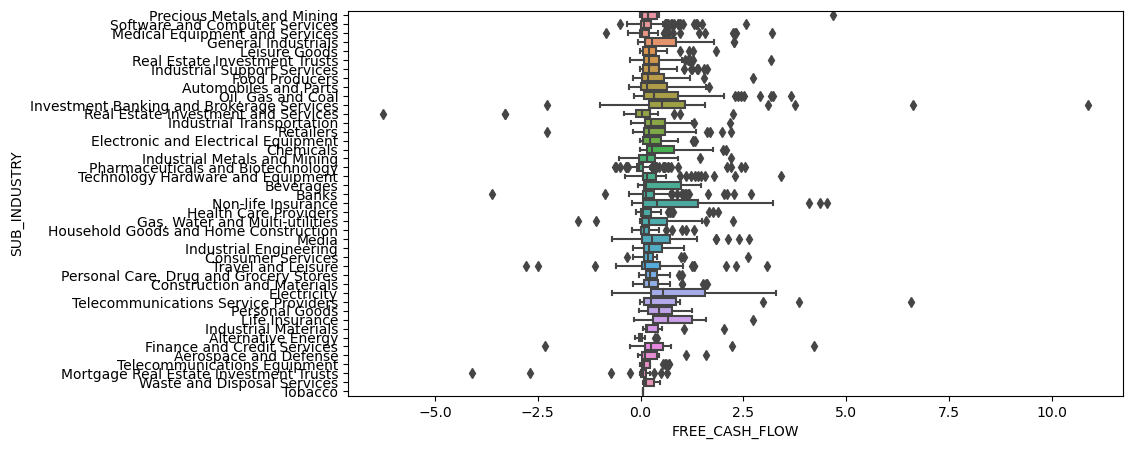

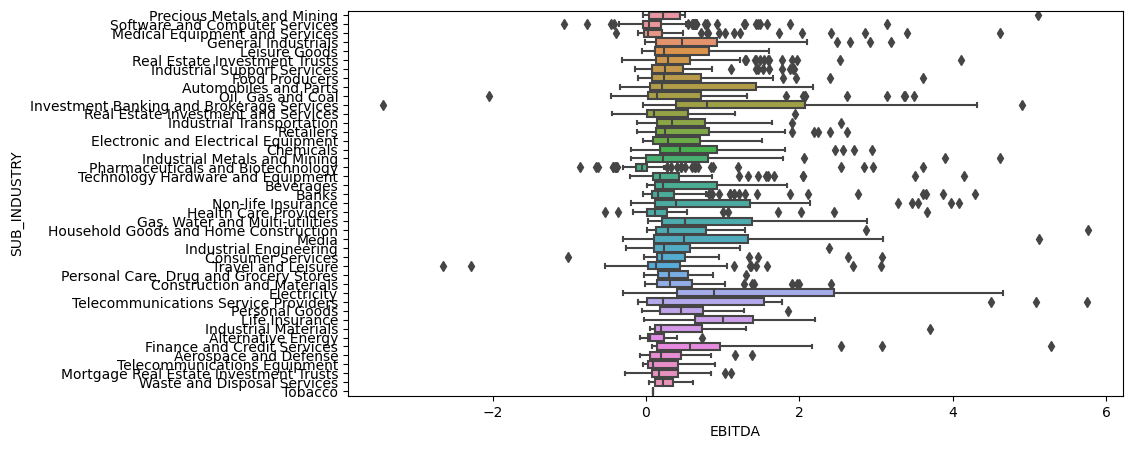

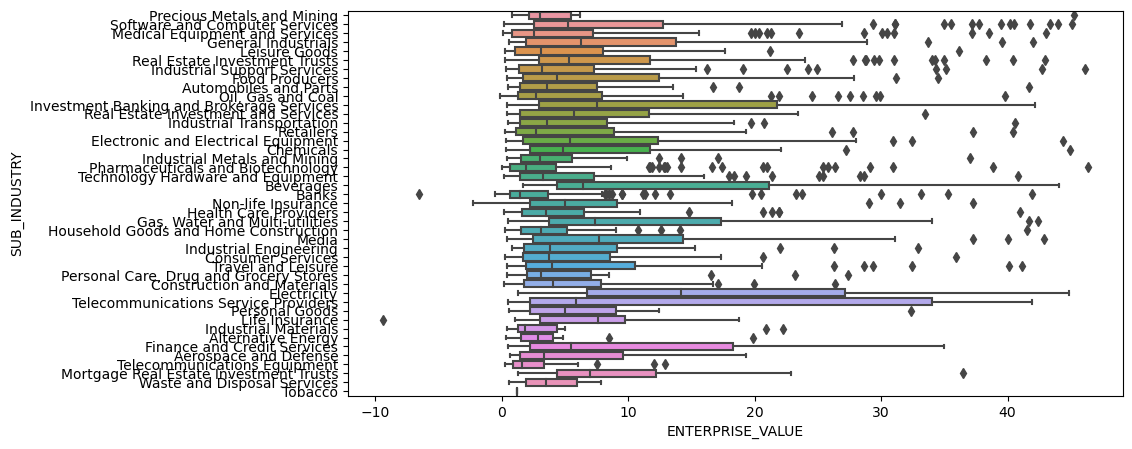

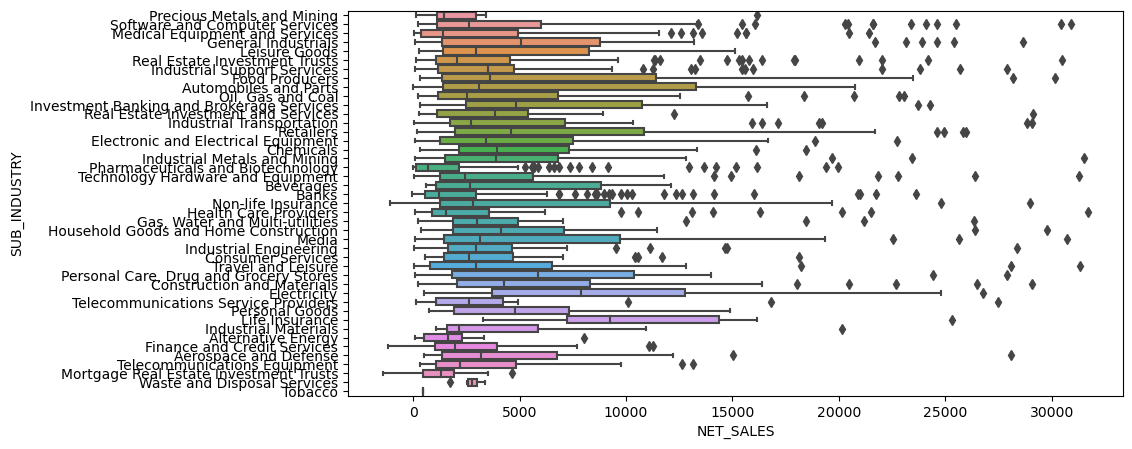

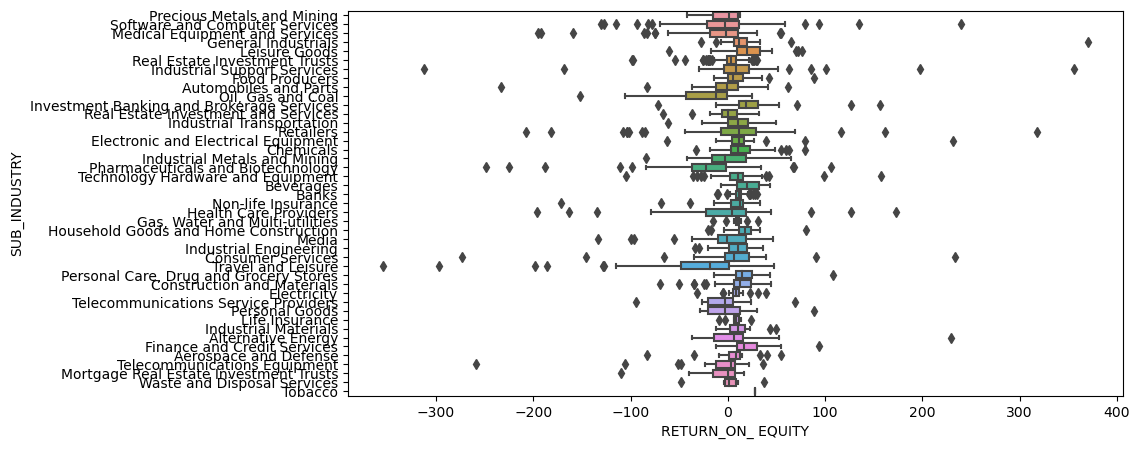

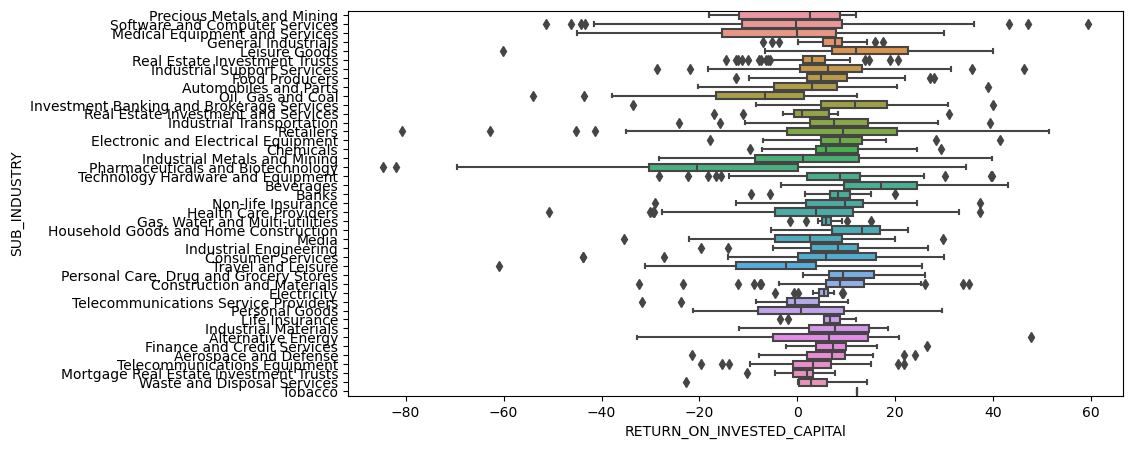

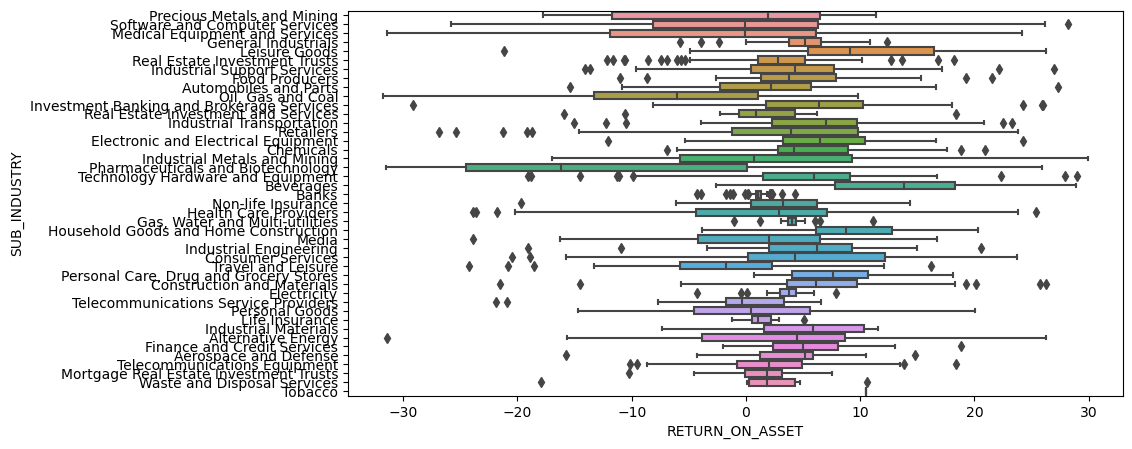

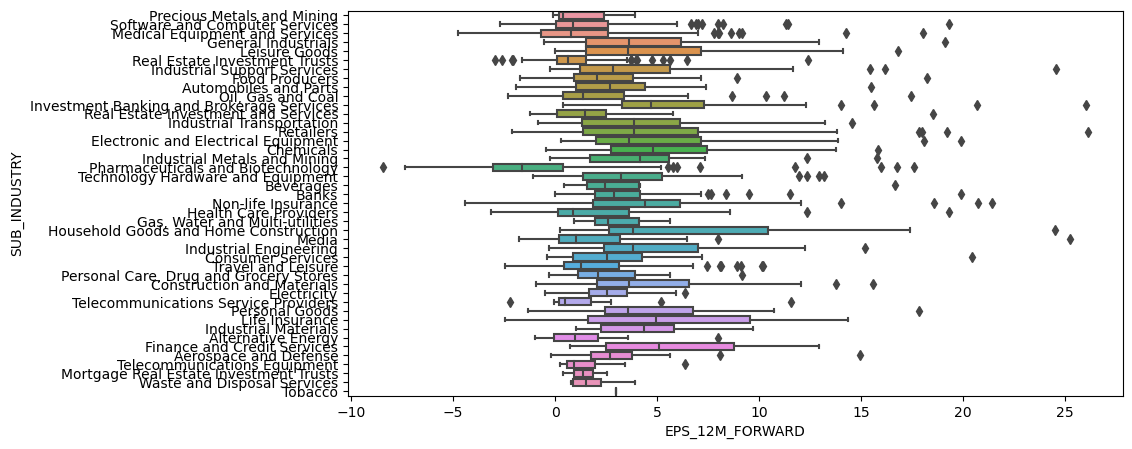

In [30]:
grafici(df, df['SUB_INDUSTRY'])

In [9]:
tabella_sub = df.groupby('SUB_INDUSTRY').mean(numeric_only=True)

In [10]:
tabella_sub.head()

,FREE_CASH_FLOW,EBITDA,ENTERPRISE_VALUE,NET_SALES,RETURN_ON_ EQUITY,RETURN_ON_INVESTED_CAPITAl,RETURN_ON_ASSET,EPS_12M_FORWARD
SUB_INDUSTRY,,,,,,,,
Aerospace and Defense,0.274574,0.315824,6.462897,5333.663773,5.330909,5.645000,3.608636,3.305000
Alternative Energy,0.032828,0.144800,4.057816,1852.664143,18.327857,3.860714,1.629286,1.550000
Automobiles and Parts,0.400121,0.663742,6.919595,6784.687520,-9.908000,2.361600,1.791200,2.911600
Banks,0.255207,0.365185,3.521632,2774.960679,11.326053,8.483842,1.024895,3.315442
Beverages,0.509128,0.564914,14.594602,4719.875125,20.197500,17.951250,13.700000,4.081250


### Cluster

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale = scaler.fit_transform(tabella_sub)

tabella_sub_scale = pd.DataFrame(scale, columns = tabella_sub.columns)
tabella_sub_scale.head()

,FREE_CASH_FLOW,EBITDA,ENTERPRISE_VALUE,NET_SALES,RETURN_ON_ EQUITY,RETURN_ON_INVESTED_CAPITAl,RETURN_ON_ASSET,EPS_12M_FORWARD
0,-0.375334,-0.797634,-0.392941,0.092904,0.058349,0.176698,0.138105,-0.047975
1,-1.204814,-1.341382,-1.135611,-1.634000,0.986430,-0.114384,-0.310845,-1.113851
2,0.055445,0.308523,-0.251916,0.812749,-1.029824,-0.358944,-0.274120,-0.286901
3,-0.441785,-0.640695,-1.301180,-1.176454,0.486448,0.639816,-0.447931,-0.041633
4,0.429470,-0.005686,2.118066,-0.211593,1.119936,2.184293,2.426992,0.423470


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tabella_sub_scale)
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,0.281819,0.772732
1,1.740670,2.137263
2,0.480081,-0.860428
3,0.675475,1.594166
4,-3.003836,0.893579


In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.48, 0.3 ])

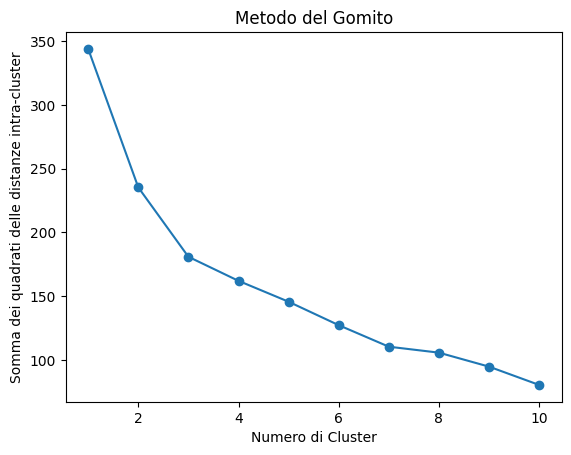

In [14]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tabella_sub_scale)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse, marker='o')
plt.title('Metodo del Gomito')
plt.xlabel('Numero di Cluster')
plt.ylabel('Somma dei quadrati delle distanze intra-cluster')
plt.show()

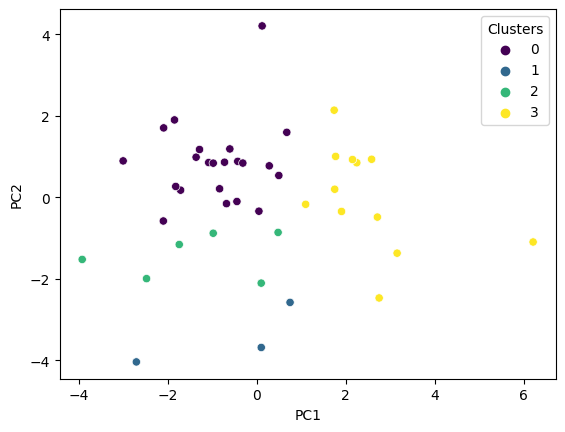

In [16]:
kmeans = KMeans(n_clusters=4, n_init="auto", random_state=42)
kmeans = kmeans.fit(tabella_sub_scale)
tabella_sub_scale['Clusters'] = kmeans.labels_


sns.scatterplot(x="PC1", y="PC2", hue=tabella_sub_scale['Clusters'],  data=pca_df, palette='viridis')
plt.show()



In [17]:
sub_df = tabella_sub_scale.copy()
sub_df['SUB_INDUSTRY'] = tabella_sub.index
sub_df

,FREE_CASH_FLOW,EBITDA,ENTERPRISE_VALUE,NET_SALES,RETURN_ON_ EQUITY,RETURN_ON_INVESTED_CAPITAl,RETURN_ON_ASSET,EPS_12M_FORWARD,Clusters,SUB_INDUSTRY
0,-0.375334,-0.797634,-0.392941,0.092904,0.058349,0.176698,0.138105,-0.047975,0,Aerospace and Defense
1,-1.204814,-1.341382,-1.135611,-1.634000,0.986430,-0.114384,-0.310845,-1.113851,3,Alternative Energy
2,0.055445,0.308523,-0.251916,0.812749,-1.029824,-0.358944,-0.274120,-0.286901,2,Automobiles and Parts
3,-0.441785,-0.640695,-1.301180,-1.176454,0.486448,0.639816,-0.447931,-0.041633,0,Banks
4,0.429470,-0.005686,2.118066,-0.211593,1.119936,2.184293,2.426992,0.423470,0,Beverages
5,0.608539,0.571960,0.141341,0.079070,0.781702,0.583813,0.644719,1.146623,0,Chemicals
6,-0.185199,-0.125600,-0.595703,0.694487,0.376329,0.664650,0.730648,0.824530,0,Construction and Materials
7,-0.344968,-0.270792,-0.361082,-0.479948,-0.275336,-0.020444,0.172358,-0.108185,0,Consumer Services
8,1.871246,2.879946,3.160331,2.087047,0.275309,0.059114,0.089038,-0.454657,1,Electricity
9,-0.140670,-0.477604,0.358783,0.128554,0.771075,0.758605,0.837644,1.144835,0,Electronic and Electrical Equipment


In [18]:
cluster_2 = sub_df[sub_df['Clusters'] == 2]

In [ ]:
cluster_2

In [ ]:
grafici(cluster_2, cluster_2['SUB_INDUSTRY'])

Group By Media e Simili

In [42]:
subset_values = list(cluster_2['SUB_INDUSTRY'].values)
df_media = df[df['SUB_INDUSTRY'].isin(subset_values)]

In [43]:
df_media.head()

,Isin,Record Name,INDUSTRY,SUB_INDUSTRY,FREE_CASH_FLOW,EBITDA,ENTERPRISE_VALUE,NET_SALES,RETURN_ON_ EQUITY,RETURN_ON_INVESTED_CAPITAl,RETURN_ON_ASSET,EPS_12M_FORWARD
160,US6516391066,NEWMONT,Basic Materials,Precious Metals and Mining,4.6660,5.1140,45.248400,16155.100,12.74,10.27,7.64,3.05
235,US03076C1062,AMERIPRISE FINL.,Financials,Investment Banking and Brokerage Services,0.7580,3.0290,28.905682,16426.277,47.78,26.93,1.71,26.01
247,US74144T1088,T ROWE PRICE GROUP,Financials,Investment Banking and Brokerage Services,3.0927,4.3223,42.164984,16643.237,35.89,30.75,25.98,12.28
260,US3635761097,ARTHUR J GALLAGHER,Financials,Non-life Insurance,1.5061,1.7675,37.237390,16618.642,12.34,8.47,4.07,6.12
269,US92939U1060,WEC ENERGY GROUP,Utilities,"Gas, Water and Multi-utilities",2.2530,2.8860,42.393626,18469.600,12.16,6.48,4.40,4.32


In [44]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 160 to 2461
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Isin                        209 non-null    object 
 1   Record Name                 209 non-null    object 
 2   INDUSTRY                    209 non-null    object 
 3   SUB_INDUSTRY                209 non-null    object 
 4   FREE_CASH_FLOW              209 non-null    float64
 5   EBITDA                      209 non-null    float64
 6   ENTERPRISE_VALUE            209 non-null    float64
 7   NET_SALES                   209 non-null    float64
 8   RETURN_ON_ EQUITY           209 non-null    float64
 9   RETURN_ON_INVESTED_CAPITAl  209 non-null    float64
 10  RETURN_ON_ASSET             209 non-null    float64
 11  EPS_12M_FORWARD             209 non-null    float64
dtypes: float64(8), object(4)
memory usage: 21.2+ KB


Linear Regression & Elastic Net su Media

In [28]:
df_media.columns

Index(['Isin', 'Record Name', 'INDUSTRY', 'SUB_INDUSTRY', 'FREE_CASH_FLOW',
       'EBITDA', 'ENTERPRISE_VALUE', 'NET_SALES', 'RETURN_ON_ EQUITY',
       'RETURN_ON_INVESTED_CAPITAl', 'RETURN_ON_ASSET', 'EPS_12M_FORWARD'],
      dtype='object')

In [45]:
X_media = df_media[['FREE_CASH_FLOW',
       'EBITDA', 'ENTERPRISE_VALUE', 'NET_SALES', 'RETURN_ON_ EQUITY',
       'RETURN_ON_INVESTED_CAPITAl', 'RETURN_ON_ASSET']]

y_media = df_media['EPS_12M_FORWARD']

Modello Lineare

In [46]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [47]:
X_media_scaled = StandardScaler().fit_transform(X_media)
X_media_scaled = sm.add_constant(X_media_scaled)

# Suddividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_media_scaled, y_media, test_size=0.3, random_state=42)

In [ ]:
# Crea il modello di regressione lineare
model = sm.OLS(y_train, X_train).fit()

# Effettua previsioni sul set di test
previsioni_1 = model.predict(X_test)

# Calcola l'errore sul set di test (o altre metriche di performance)
errore = np.mean((y_test - previsioni_1)**2)
print(f'Errore quadratico medio sul set di test: {errore}')

# Stampa il summary del modello
print(model.summary())

# Esegui il test di White per l'eteroschedasticità
white_test_results = het_white(model.resid, X_train)
print("\nRisultati del test di White:")
print("Test Statistic:", white_test_results[0])
print("P-value:", white_test_results[1])
print("Lagrange Multiplier Statistic:", white_test_results[2])
print("F-statistic:", white_test_results[3])

In [ ]:
from scipy.stats import shapiro 


shapiro(model.resid)

In [51]:
model.rsquared_adj

0.25203188892017325

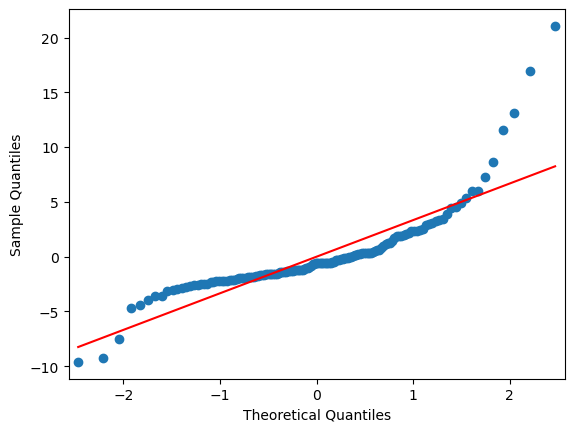

In [56]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(model.resid, line='r')

plt.show()

In [53]:
mea = np.mean(abs(y_test - previsioni_1))
mea


2.868333202422552

In [54]:
mse = mean_squared_error(y_test, previsioni_1)
rmse = np.sqrt(mse)
rmse

4.80334542876522

In [55]:
beta_coeff = model.params
beta_coeff

const    3.605767
x1       0.343895
x2       0.047593
x3       0.328327
x4       0.136266
x5       0.610332
x6       3.822324
x7      -2.632262
dtype: float64

Valori predetti vs valori reali

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score

# Aggiungi una colonna di costanti per il termine noto
X_2 = df_media[['EBITDA', 'RETURN_ON_ASSET', 'ENTERPRISE_VALUE', 'RETURN_ON_INVESTED_CAPITAl']]
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)
X_2_scaled = sm.add_constant(X_2_scaled)

# Variabile dipendente
y_2 = df_media['EPS_12M_FORWARD']

# Suddivisione in set di addestramento e test
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2_scaled, y_2, test_size=0.3, random_state=42)

# Definizione del modello
model_2 = sm.OLS(y2_train, X2_train)

# Inizializzazione delle variabili per memorizzare gli errori della cross-validation
cv_errors = []
cv_mea= []
R2=[]
B0=[]
B1=[]
B2=[]
B3=[]
B4=[]
B=[]
# Definizione del processo di cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterazione sui fold della cross-validation
for train_index, val_index in kf.split(X2_train):
    # Divisione dei dati in set di addestramento e di validazione per questo fold
    X_train_fold, X_val_fold = X2_train[train_index], X2_train[val_index]
    y_train_fold, y_val_fold = y2_train.iloc[train_index], y2_train.iloc[val_index]

    # Addestramento del modello sul set di addestramento del fold corrente
    fold_model = model_2.fit_regularized(alpha=0.1)  # Esempio di regolarizzazione L1 con alpha=0.1

    # Calcolo dell'errore sul set di validazione del fold corrente
    pred_val_fold = fold_model.predict(X_val_fold)
    fold_error = np.mean((y_val_fold - pred_val_fold)**2)
    cv_errors.append(fold_error)

    mea_fold=np.mean(abs(y_val_fold- pred_val_fold))
    cv_mea.append(mea_fold)

    R2_fold= r2_score(y_val_fold, pred_val_fold)
    R2.append(R2_fold)

    beta_coefficients = fold_model.params

    B0.append(beta_coefficients[0])
    
    B1.append(beta_coefficients[1])

    B2.append(beta_coefficients[2])

    B3.append(beta_coefficients[3])
    
    B4.append(beta_coefficients[4])



# Calcolo dell'errore medio della cross-validation
cv_error_mean = np.mean(cv_errors)
print(f'Errore medio della cross-validation: {cv_error_mean}')
mea_error_mean= np.mean(cv_mea)
print(f'MEA medio della cross-validation: {mea_error_mean}')
R2_mean=np.mean(R2)
print(f'R2 medio della cross-validation: {R2_mean}')

#Coefficienti
B0_mean=np.mean(B0)
print(f'B0 medio della cross-validation: {B0_mean}')
B1_mean=np.mean(B1)
print(f'B1 medio della cross-validation: {B1_mean}')
B2_mean=np.mean(B2)
print(f'B2 medio della cross-validation: {B2_mean}')
B3_mean=np.mean(B3)
print(f'B3 medio della cross-validation: {B3_mean}')
B4_mean=np.mean(B4)
print(f'B4 medio della cross-validation: {B4_mean}')

B.append(B0_mean)
B.append(B1_mean)
B.append(B2_mean)
B.append(B3_mean)
B.append(B4_mean)

In [ ]:
values=['EPS_12M_FORWARD','EBITDA', 'RETURN_ON_ASSET', 'ENTERPRISE_VALUE', 'RETURN_ON_INVESTED_CAPITAl']
std_B=[]

for i in values:
  std_b=df_media[i].std()
  std_B.append(std_b)
print(std_B)

In [ ]:
# Descaling dei coefficienti medi
risultato = []
for elemento1, elemento2 in zip(B,std_B):
    risultato.append((elemento1/elemento2))

risultato

In [97]:
var_da_X = df_media[['EBITDA', 'RETURN_ON_ASSET', 'ENTERPRISE_VALUE', 'RETURN_ON_INVESTED_CAPITAl']]
var_da_X = sm.add_constant(var_da_X)
var_da_y = df_media['EPS_12M_FORWARD']

model_final = sm.OLS(var_da_y, var_da_X).fit()
residual = model_final.resid


In [ ]:
y_pred = np.dot(var_da_X, risultato) + residual
y_pred

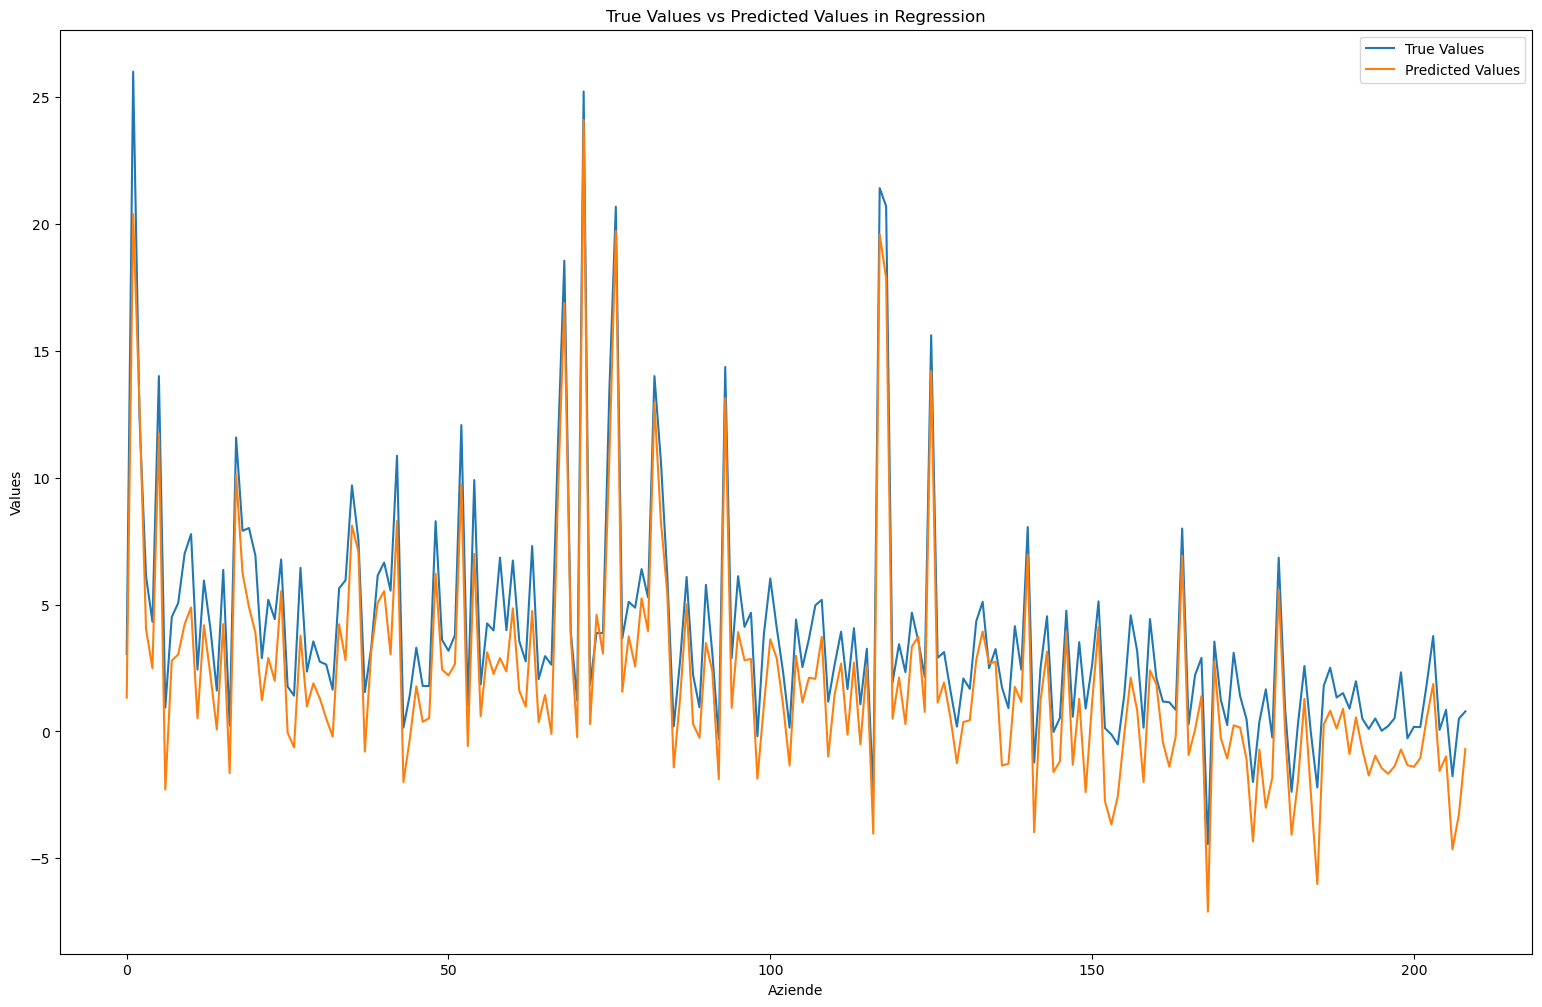

In [100]:
#Grafico per visualizzare i risultati
indices = np.arange(len(y_2))

# Crea un grafico a linee
plt.figure(figsize=(19,12))
plt.plot(indices, var_da_y, label='True Values')
plt.plot(indices, y_pred, label='Predicted Values')

# Etichettatura degli assi
plt.xlabel('Aziende')
plt.ylabel('Values')

# Aggiunta di una legenda
plt.legend()

# Aggiunta di un titolo al grafico
plt.title('True Values vs Predicted Values in Regression')

# Mostra il grafico
plt.show()